In [45]:
import SNPLIB
import math
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from numpy import random

In [46]:
Fst = 0.1
num_generations = 200
effective_sample_size = math.floor(num_generations/2/(1-math.exp(-Fst)))
num_snps = 100000
num_causal_snps = 10000
num_samples = 4000
num_traits = 10000
num_pairs = num_traits//2

In [47]:
aaf = 0.05+0.9*np.random.rand(num_snps)
pop_af = SNPLIB.UpdateAf(aaf,2,num_generations,effective_sample_size)
pop = np.zeros((num_samples,2),dtype='double',order='F')
pop[:,0] = np.sort(np.random.beta(0.1,0.1,num_samples))
pop[:,1] = 1.0-pop[:,0]
af = pop@pop_af

In [49]:
obj = SNPLIB.SNPLIB()
obj.GenerateIndividuals(af)
geno_d = obj.UnpackGeno()*random.randn(1,num_snps)

In [ ]:
"""
Same additive effects
Same direction
"""
true_genetic_corr = np.zeros(num_pairs)
true_env_corr = np.zeros(num_pairs)
sim_traits = np.zeros((num_samples, num_traits), dtype='double', order='F')
for i in range(num_pairs):
    all_ind = np.arange(num_snps)
    additive_snp = random.choice(all_ind,replace=False)
    all_ind = np.setdiff1d(all_ind,additive_snp)
    snp_ind1 = random.choice(all_ind,size=(num_causal_snps,1),replace=False).squeeze()
    all_ind = np.setdiff1d(all_ind,snp_ind1)
    num_shared_snps = random.randint(num_causal_snps)
    additive_effect1 = geno_d[:,additive_snp].copy()
    additive_effect2 = geno_d[:,additive_snp].copy()
    
    

In [ ]:
"""
Same additive effects
Opposite direction
"""
true_genetic_corr = np.zeros(num_pairs)
true_env_corr = np.zeros(num_pairs)
sim_traits = np.zeros((num_samples, num_traits), dtype='double', order='F')
for i in range(num_pairs):
    all_ind = np.arange(num_snps)
    snp_ind1 = random.choice(all_ind,size=(num_causal_snps,1),replace=False).squeeze()

In [ ]:
"""
Difference additive effects
"""
true_genetic_corr = np.zeros(num_pairs)
true_env_corr = np.zeros(num_pairs)
sim_traits = np.zeros((num_samples, num_traits), dtype='double', order='F')
for i in range(num_pairs):
    all_ind = np.arange(num_snps)
    snp_ind1 = random.choice(all_ind,size=(num_causal_snps,1),replace=False).squeeze()

In [53]:
all_ind = np.arange(num_snps)
additive_snp = random.choice(all_ind,replace=False)
all_ind = np.setdiff1d(all_ind,additive_snp)
snp_ind1 = random.choice(all_ind,size=(num_causal_snps,1),replace=False).squeeze()
all_ind = np.setdiff1d(all_ind,snp_ind1)
num_shared_snps = random.randint(num_causal_snps)
snp_ind2 = random.choice(snp_ind1, size=(num_shared_snps,1),replace=False).squeeze()
snp_ind2 = np.concatenate((snp_ind2, random.choice(all_ind, size=(num_causal_snps-num_shared_snps,1),replace=False).squeeze()))
additive_effect1 = geno_d[:,additive_snp].copy()
random_effect1 = np.sum(geno_d[:,snp_ind1], axis=0)
additive_effect2 = geno_d[:,additive_snp].copy()

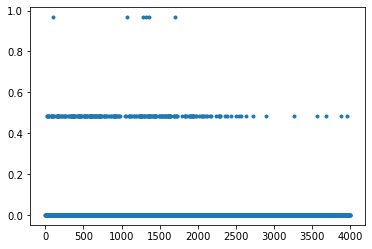

In [61]:
plt.plot(additive_effect2,'.')
plt.show()

In [36]:
snp_ind2

array([52393, 29480, 17113, ..., 76663, 93661, 97594])

In [31]:
geno_d.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False